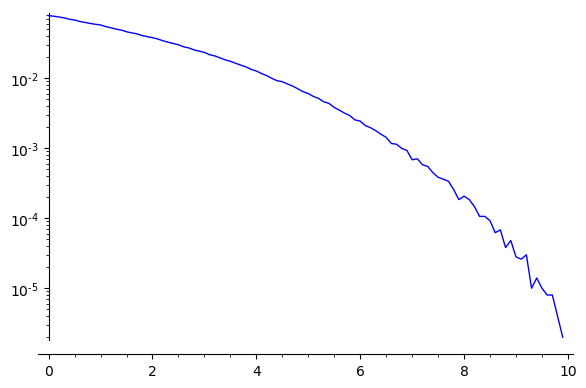

In [192]:
set_random_seed(0)
seq_len = 500000

def genBER(EbN0db,p):
    cnt = 0
    EbN0 = 10^(EbN0db/10)
    sigma = sqrt(1/(2*EbN0))
    norm_dist = RealDistribution('gaussian', sigma)
    unif_dist = RealDistribution('uniform',[0,1])
    msg = [0 for i in range(seq_len)]
    norm_noise = [0 for i in range(seq_len)]
    for i in range(seq_len):
        if unif_dist.get_random_element() < p:
            msg[i] = 1
        noise = norm_dist.get_random_element()
        norm_noise[i] = noise
#     print(norm_noise)
    
    rev_msg = [0 for i in range(seq_len)]
    for i in range(seq_len):
        rev_sig = (1-2*msg[i]) + norm_noise[i]
        x = 0
        if rev_sig == 0:
            x=randint([0,1])
        elif rev_sig < 0:
            x = 1
        rev_msg[i] = x
        if rev_msg[i] != msg[i]:
            cnt += 1
    return 1.0*cnt/seq_len

v = [(x, genBER(x,0.5)) for x in srange(0,10, 0.1)]
show(line(v, scale="semilogy"))
